In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('./R4AlgorithmData.csv', header=0, index_col=0)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352830 entries, 0 to 1352829
Data columns (total 13 columns):
CatalogID                                    1352830 non-null int64
Total_Item_Count                             1352830 non-null int64
Total_Accumulated_Days_With_Trash_Penalty    1352830 non-null float64
Avg_Sale_Price                               1352830 non-null float64
Total_Sold                                   1352830 non-null int64
R4BuyOfferPct                                1352830 non-null float64
R4sBuyOfferPct                               1352830 non-null float64
avg_Item_Acc_Days                            1352830 non-null float64
avg_Sold_Acc_Days                            1352830 non-null float64
R4BuyOfferAmt                                1352830 non-null float64
R4sBuyOfferAmt                               1352830 non-null float64
chain_R4BuyOfferPct                          1352830 non-null float64
chain_R4BuyOfferAmt                          1352830 

In [114]:
df.head(10)

,CatalogID,Total_Item_Count,Total_Accumulated_Days_With_Trash_Penalty,Avg_Sale_Price,Total_Sold,R4BuyOfferPct,R4sBuyOfferPct,avg_Item_Acc_Days,avg_Sold_Acc_Days,R4BuyOfferAmt,R4sBuyOfferAmt,chain_R4BuyOfferPct,chain_R4BuyOfferAmt
0,115,5,1595.08,7.9900,1,0.00,0.0,319.016000,1595.080000,0.00,0.0,0.00,0.00
1,514,5,2197.75,3.4950,2,0.00,0.0,439.550000,1098.875000,0.00,0.0,0.00,0.00
2,1068,11,1452.39,3.9900,6,0.05,0.0,132.035455,242.065000,0.20,0.0,0.05,0.20
3,1111,8,905.37,1.9866,6,0.05,0.0,113.171250,150.895000,0.10,0.0,0.05,0.10
4,1135,16,2351.72,5.5345,11,0.05,0.0,146.982500,213.792727,0.28,0.0,0.05,0.28
5,1349,7,2497.78,3.0000,1,0.00,0.0,356.825714,2497.780000,0.00,0.0,0.00,0.00
6,1735,13,3088.86,7.7425,4,0.00,0.0,237.604615,772.215000,0.00,0.0,0.00,0.00
7,1764,16,3054.61,3.4214,6,0.00,0.0,190.913125,509.101667,0.00,0.0,0.00,0.00
8,1784,22,10502.66,5.9900,4,0.00,0.0,477.393636,2625.665000,0.00,0.0,0.00,0.00
9,3327,19,2092.88,4.5920,10,0.05,0.0,110.151579,209.288000,0.23,0.0,0.05,0.23


In [115]:
#sns.set_style('whitegrid')

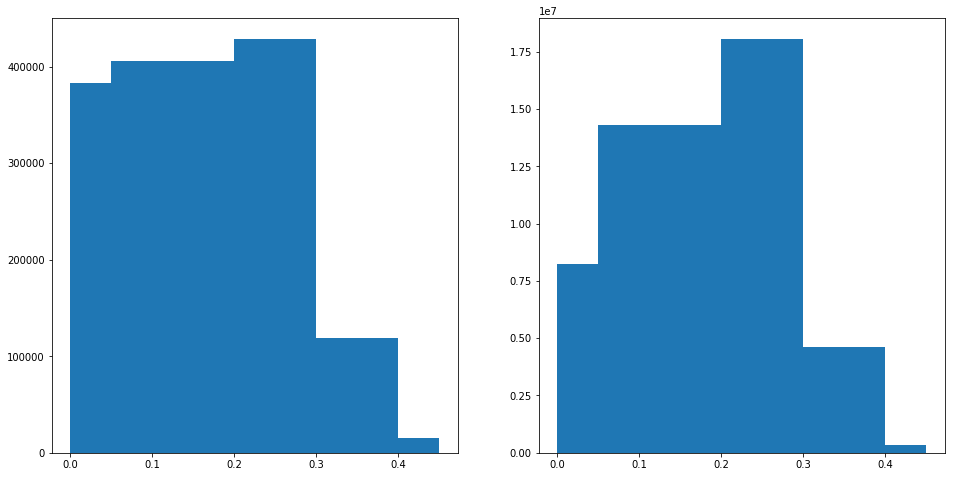

In [116]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.hist(df['R4BuyOfferPct'], bins=[0, 0.05, 0.2, 0.3, 0.4, 0.45])
ax2.hist(df['R4BuyOfferPct'], bins=[0, 0.05, 0.2, 0.3, 0.4, 0.45], weights=df['Total_Item_Count'])
plt.show()

In [117]:
print(np.histogram(df['R4BuyOfferPct'], bins=[0, 0.05, 0.2, 0.3, 0.4, 0.45], weights=df['Total_Item_Count']))
print(np.histogram(df['avg_Item_Acc_Days'], bins=[0, 8, 31, 91, 180, 9999], weights=df['Total_Item_Count']))

(array([ 8223328, 14320377, 18066865,  4614225,   351842], dtype=int64), array([0.  , 0.05, 0.2 , 0.3 , 0.4 , 0.45]))
(array([  349546,  4616095, 18064357, 14322702,  8223937], dtype=int64), array([   0,    8,   31,   91,  180, 9999]))


In [118]:
grades_R4Dist = np.histogram(df['avg_Item_Acc_Days'], bins=[0, 8, 31, 91, 180, 9999], weights=df['Total_Item_Count'])

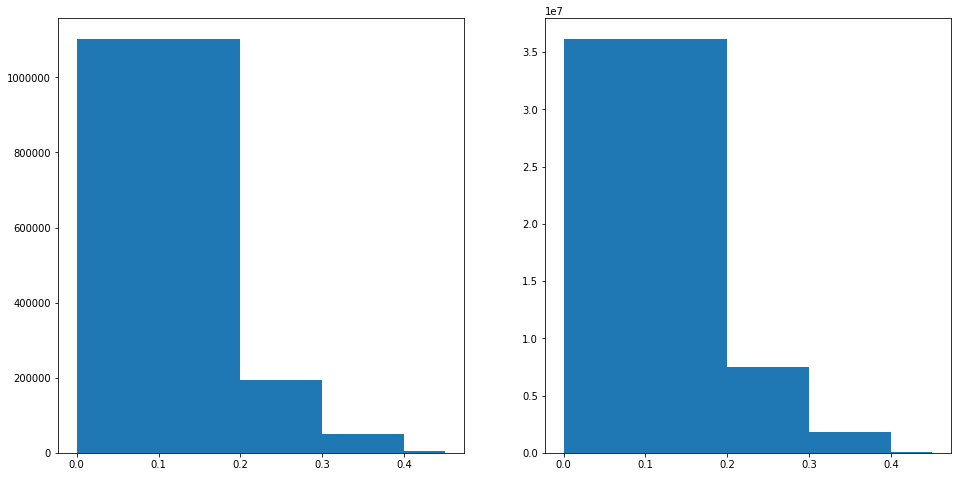

In [119]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.hist(df['R4sBuyOfferPct'], bins=[0, 0.2, 0.3, 0.4, 0.45])
ax2.hist(df['R4sBuyOfferPct'], bins=[0,0.2, 0.3, 0.4, 0.45], weights=df['Total_Item_Count'])
plt.show()

In [120]:
print(np.histogram(df['R4sBuyOfferPct'], bins=[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.45]))

(array([779518, 175336, 148246, 194081,  50742,   4907], dtype=int64), array([0.  , 0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.45]))


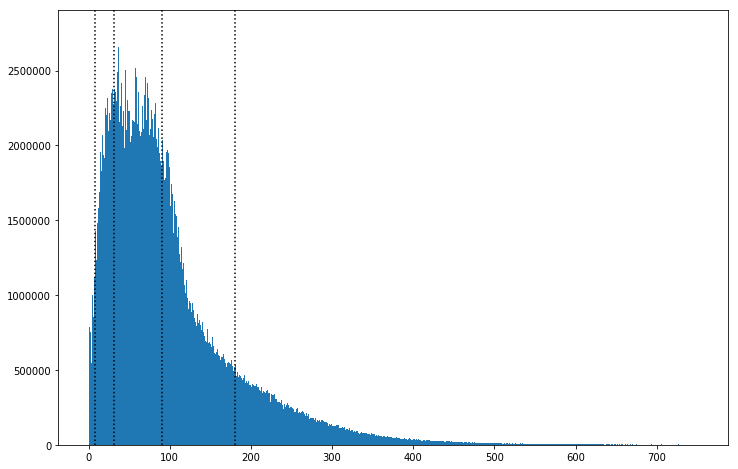

In [175]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(round(df['avg_Item_Acc_Days'], 0), range=(0,750), bins=750, weights=df['Total_Item_Count'] * df['Avg_Sale_Price'])
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
plt.show()

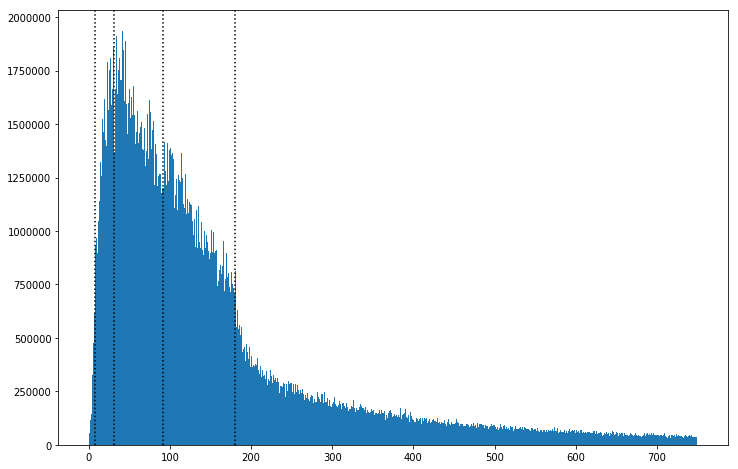

In [176]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(round(df['avg_Sold_Acc_Days'], 0), range=(0,750), bins=750,  weights=df['Total_Item_Count'] * df['Avg_Sale_Price'])
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
plt.show()

In [30]:
filt_under180 = df['avg_Sold_Acc_Days'] <= 180
filt_over220 = df['avg_Sold_Acc_Days'] > 300
print((df[filt_under180]['Total_Sold']/df[filt_under180]['Total_Item_Count']).mean(), 
      (df[~filt_under180]['Total_Sold']/df[~filt_under180]['Total_Item_Count']).mean())

0.7063793730277994 0.3855591876210395


In [142]:
grades_R4Dist = np.histogram(df['avg_Item_Acc_Days'], bins=[0, 8, 31, 91, 180, 9999], weights=df['Total_Item_Count'] * df['Avg_Sale_Price'])
print(grades_R4Dist)

(array([6.88003947e+06, 4.56207476e+07, 1.33157596e+08, 8.68196352e+07,
       4.46065349e+07]), array([   0,    8,   31,   91,  180, 9999]))


In [177]:
grade_Amax = 13
grade_Bmax = 50
grade_Cmax = 150
grade_Dmax = 486
print(np.histogram(df['avg_Sold_Acc_Days'], bins=[0, grade_Amax, grade_Bmax, grade_Cmax, grade_Dmax, 9999], 
                   weights=df['Total_Item_Count'] * df['Avg_Sale_Price'])
)

(array([7.83347605e+06, 5.97234760e+07, 1.24809065e+08, 8.63958924e+07,
       3.81524775e+07]), array([   0,   13,   50,  150,  486, 9999]))
